In [1]:
import numpy as np    # Importing the libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HeartFailureData.zip')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [6]:
# Data cleaning

# Numeric Columns
num_cols = [] 
for column in df.columns:
    # Not considering the label, FastingBS and any other categorical. It is a binary classification task.
    if ((df[column].dtype != 'object') & (df[column].nunique() > 2)):  
        num_cols.append(column)
num_cols

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

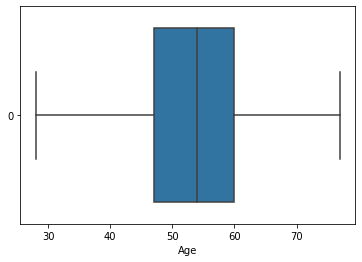

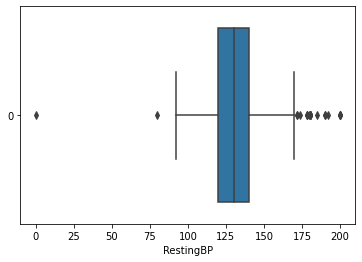

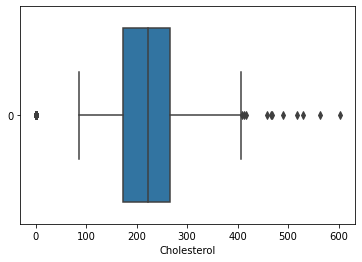

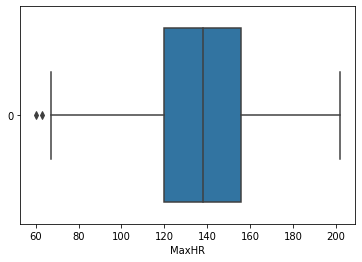

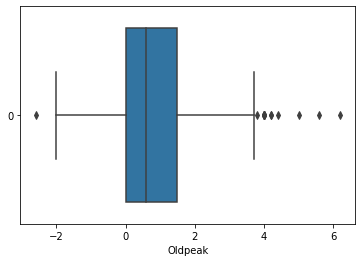

In [7]:
for column in num_cols:
    sns.boxplot(data = df[column], orient = 'h')
    plt.xlabel(column)
    plt.show()

In [8]:
for column in num_cols:
    # Calculating the 75th and 25th percentiles from the boxplot for each continous column
    q75, q25 = np.percentile(df[column], [75, 25])
    # Calculating the Inter - Quartile Range for each column
    IQR = q75 - q25 
    upper_limit = q75 + 1.5 * IQR
    lower_limit = q25 - 1.5 * IQR
    # Filtering out the outliers
    df = df[(df[column] > lower_limit) & (df[column] < upper_limit)]  

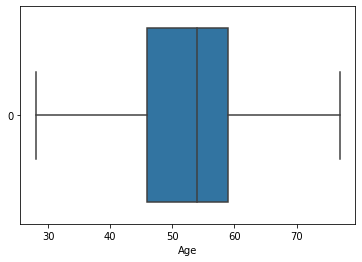

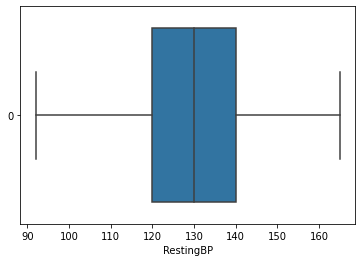

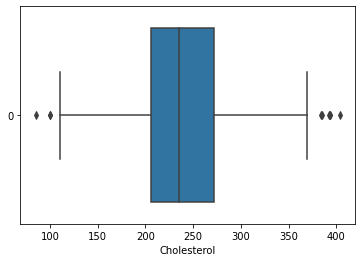

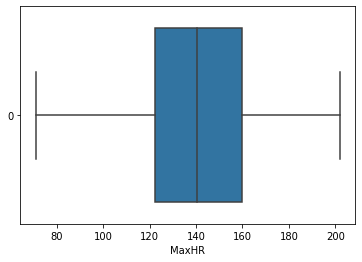

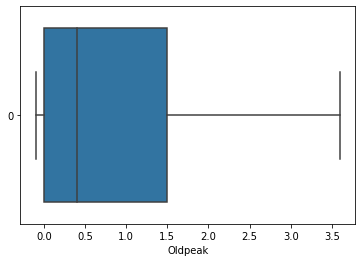

In [9]:
for column in num_cols:
    sns.boxplot(data = df[column], orient = 'h')
    plt.xlabel(column)
    plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             690 non-null    int64  
 1   Sex             690 non-null    object 
 2   ChestPainType   690 non-null    object 
 3   RestingBP       690 non-null    int64  
 4   Cholesterol     690 non-null    int64  
 5   FastingBS       690 non-null    int64  
 6   RestingECG      690 non-null    object 
 7   MaxHR           690 non-null    int64  
 8   ExerciseAngina  690 non-null    object 
 9   Oldpeak         690 non-null    float64
 10  ST_Slope        690 non-null    object 
 11  HeartDisease    690 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
# Checking missing data
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

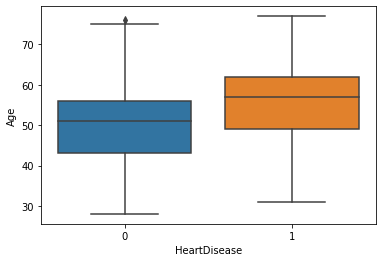

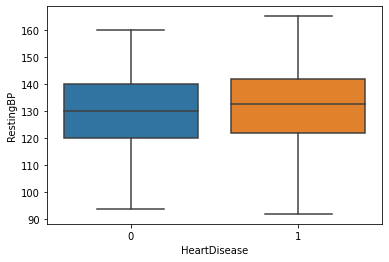

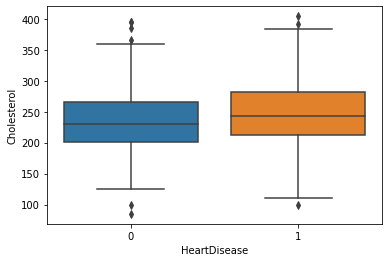

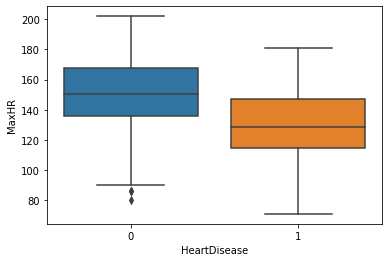

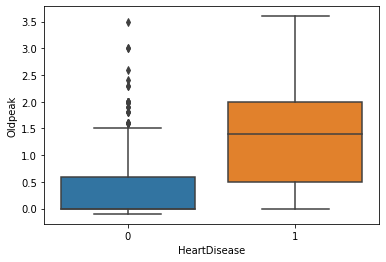

In [12]:
for column in num_cols:
    sns.boxplot(data = df, y = column, x = 'HeartDisease')
    plt.show()

In [13]:
cat_cols = df.select_dtypes(include = "object").columns
cat_cols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

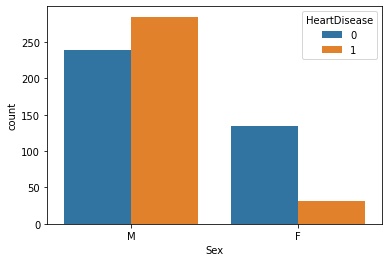

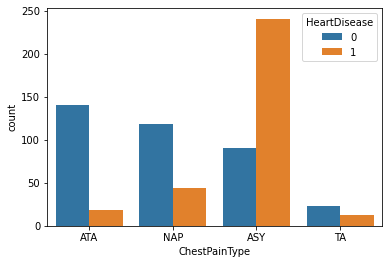

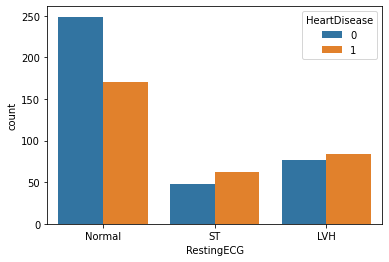

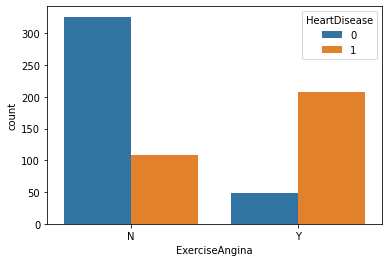

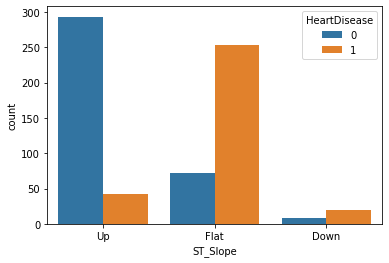

In [14]:
for column in cat_cols:
    sns.countplot(data = df, x = column, hue = 'HeartDisease')
    plt.show()

<AxesSubplot:xlabel='FastingBS', ylabel='count'>

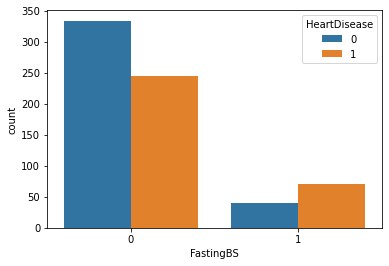

In [15]:
sns.countplot(data = df, x = 'FastingBS', hue = 'HeartDisease')

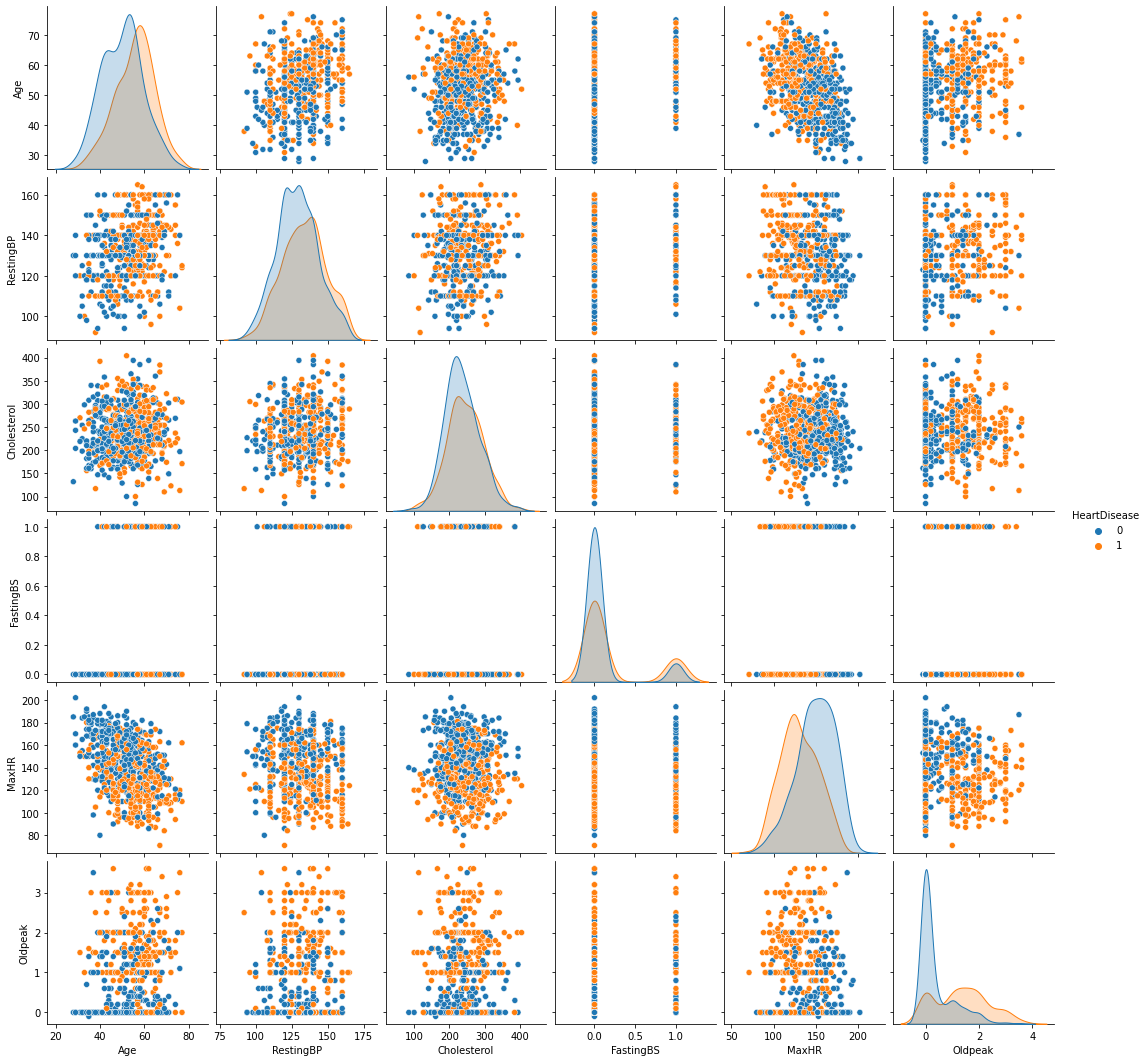

In [16]:
sns.pairplot(data = df, hue = 'HeartDisease')

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

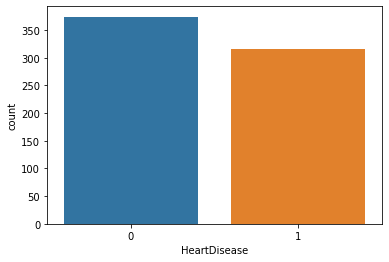

In [17]:
sns.countplot(data = df, x = 'HeartDisease')

In [18]:
df['HeartDisease'].value_counts()

0    374
1    316
Name: HeartDisease, dtype: int64

In [23]:
encoded_df = pd.get_dummies(df, drop_first = True)
encoded_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


<AxesSubplot:>

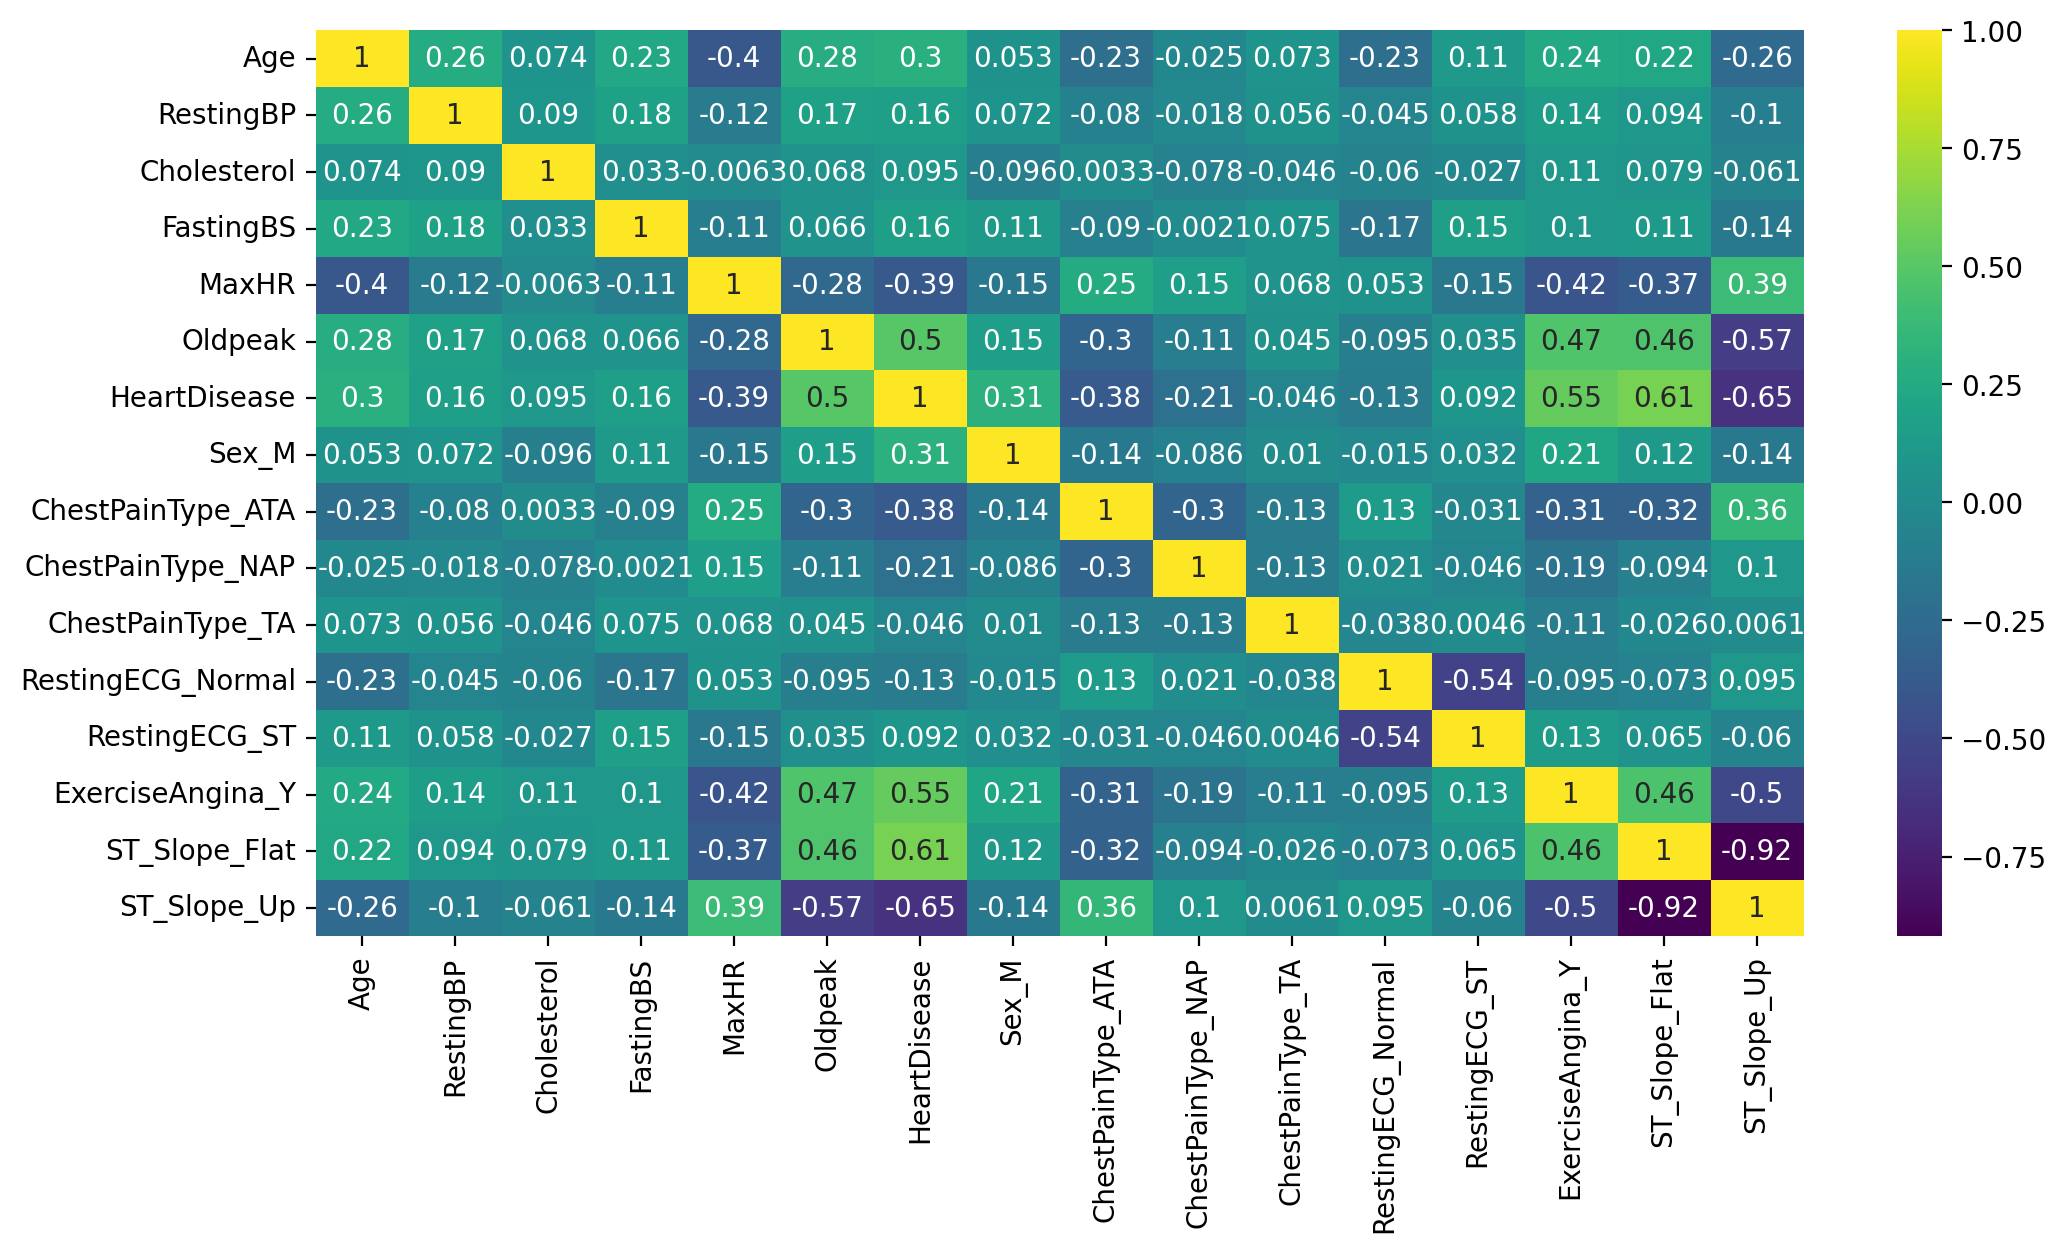

In [24]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.heatmap(data = encoded_df.corr(), annot = True, cmap = 'viridis')

In [25]:
endcoded_df = encoded_df.drop('ST_Slope_Flat', axis = 1)

In [26]:
# Modeling

# Features
X = encoded_df.drop('HeartDisease', axis = 1)
# Target label
y = encoded_df['HeartDisease'] 

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test) 

In [29]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_model = LogisticRegression(penalty = 'elasticnet', solver = 'saga', max_iter = 1000, class_weight = 'balanced')
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)
param_grid = {'l1_ratio': l1_ratio, 'C': C}

In [30]:
log_grid_model = GridSearchCV(log_model, param_grid, cv = 10)
log_grid_model.fit(scaled_X_train, y_train);

In [31]:
log_grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.0}

In [32]:
log_preds = log_grid_model.predict(scaled_X_test)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        48
           1       0.93      0.95      0.94        56

    accuracy                           0.93       104
   macro avg       0.93      0.93      0.93       104
weighted avg       0.93      0.93      0.93       104



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


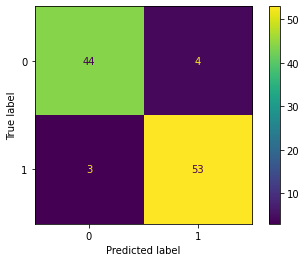

In [33]:
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_test, log_preds))
plot_confusion_matrix(log_grid_model, scaled_X_test, y_test)

In [34]:
# SVM

from sklearn.svm import SVC
svm_model = SVC(class_weight = 'balanced')
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

In [35]:
svm_grid_model = GridSearchCV(svm_model, param_grid, cv = 10)
svm_grid_model.fit(scaled_X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [36]:
svm_grid_model.best_params_

{'C': 0.001, 'gamma': 'scale', 'kernel': 'linear'}

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        48
           1       0.88      0.95      0.91        56

    accuracy                           0.90       104
   macro avg       0.91      0.90      0.90       104
weighted avg       0.91      0.90      0.90       104



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


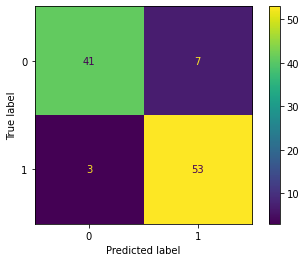

In [37]:
svm_preds = svm_grid_model.predict(scaled_X_test)
print(classification_report(y_test, svm_preds))
plot_confusion_matrix(svm_grid_model, scaled_X_test, y_test)